INFO:tensorflow:Restoring parameters from /home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt
It cost 4.079656 sec


/home/tingwei/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


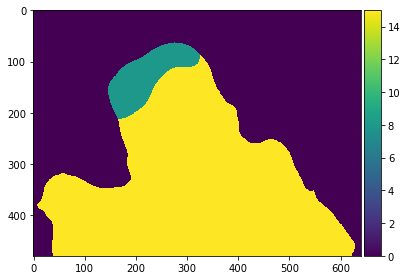

INFO:tensorflow:Restoring parameters from /home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt
It cost 4.211776 sec


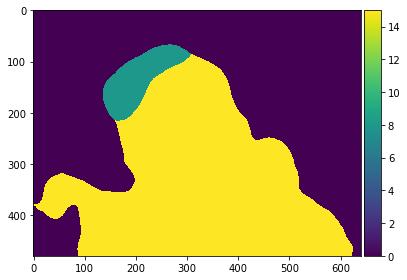

INFO:tensorflow:Restoring parameters from /home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt
It cost 4.328303 sec


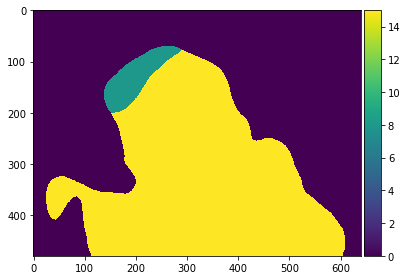

INFO:tensorflow:Restoring parameters from /home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt
It cost 4.157680 sec


KeyboardInterrupt: 

In [1]:
%matplotlib inline

from __future__ import division

import sys
import tensorflow as tf
import skimage.io as io
import numpy as np

sys.path.append("/home/tingwei/All/Machine_Learning/Image_Segmentation/Daniil_tf-image-segmentation/")
sys.path.append("/home/tingwei/All/Machine_Learning/Image_Segmentation/models/slim")

fcn_16s_checkpoint_path = '/home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt'


slim = tf.contrib.slim

from tf_image_segmentation.models.fcn_8s import FCN_8s
from tf_image_segmentation.utils.inference import adapt_network_for_any_size_input
from tf_image_segmentation.utils.pascal_voc import pascal_segmentation_lut

number_of_classes = 21


image_tensor = tf.placeholder("uint8", [None, None, 3])


# Fake batch for image and annotation by adding
# leading empty axis.
image_batch_tensor = tf.expand_dims(image_tensor, axis=0)

# Be careful: after adaptation, network returns final labels
# and not logits
FCN_8s = adapt_network_for_any_size_input(FCN_8s, 32)


pred, fcn_16s_variables_mapping = FCN_8s(image_batch_tensor=image_batch_tensor,
                                          number_of_classes=number_of_classes,
                                          is_training=False)

# The op for initializing the variables.
initializer = tf.local_variables_initializer()

saver = tf.train.Saver()



import numpy as np
import cv2
import threading
import time
import matplotlib.pyplot as plt


cap = cv2.VideoCapture(0)
ret, Frame = cap.read()


def CaptureVideo():
    
    global Frame
    while(True):
        # Capture frame-by-frame
        ret, Frame = cap.read()
 
        # Display the resulting frame
        cv2.imshow('Frame',Frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


CVthread = threading.Thread(target=CaptureVideo,)
CVthread.start()
            
            
while(True):            
    
    with tf.Session() as sess:
    
        sess.run(initializer)

        saver.restore(sess, "/home/tingwei/All/Machine_Learning/Image_Segmentation/checkpoints/fcn_8s_checkpoint/model_fcn8s_final.ckpt")

        tStart = time.time()
        
        image_np, pred_np = sess.run([image_tensor, pred], feed_dict= {image_tensor : Frame})
    
        tEnd = time.time()
        
        print "It cost %f sec" % (tEnd - tStart)

        #io.imshow(image_np)
        #io.show()
    
        io.imshow(pred_np.squeeze())
        io.show()
        